<a href="https://colab.research.google.com/github/sujayjoshi66/Gender-Identification/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import cv2
import pickle
from glob import glob

In [ ]:
all_female_paths = glob('./data/female/*.jpg')
all_male_paths = glob('./data/male/*.jpg')

#source - https://github.com/opencv/opencv/tree/master/data/haarcascades
hcc = cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')  #creating an object of haar cascade classifier

In [ ]:
#function to crop the faces and store them in a separate folder
def crop_images(img_path, gender, i):
    img = cv2.imread(img_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = hcc.detectMultiScale(gray_img, 1.5, 5)
    for x,y,w,h in face:
        cropped_img = img[y:y+h, x:x+w]
        if gender=='male':
            cv2.imwrite('./data/cropped/male_crop/{}_{}.png'.format(gender, i), cropped_img)
        elif gender == 'female':
            cv2.imwrite('./data/cropped/female_crop/{}_{}.png'.format(gender, i), cropped_img)
#Function Call to crop all the images
path1 = all_male_paths[0]
path2 = all_female_paths[0]
for i, path1 in enumerate(all_male_paths):
    crop_images(path1, 'male', i)
    #print('image at {} cropped'.format(path1))
for i, path2 in enumerate(all_female_paths):
    crop_images(path2, 'female', i)    
    #print('image at {} cropped'.format(path2))

In [ ]:
cropped_females = glob('./data/cropped/female_crop/*.png')
cropped_males = glob('./data/cropped/male_crop/*.png')
#creating a list to store all the female and male paths together 
path = cropped_females + cropped_males 

In [ ]:
df.describe()

,size
count,6058.000000
mean,155.640310
std,72.376817
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


In [ ]:
def image_size(path):
    img = Image.open(path)
    #print('image at {} accessed'.format(path))
    return img.size[0]    #taking only the first index value as all the images are in the form of a square

In [ ]:
df_updated = df[df['size']>80]    #considering those elements which have a size>80 
len(df_updated)

5462

In [ ]:
def find_gender(path_string):
    #splitting the path_string to get the gender
    return path_string.split('\\')[1].split('_')[0]
#adding a gender column to the dataframe
df_updated['gender'] = df_updated['path'].apply(find_gender)

C:\Users\sujay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
#image resize
def resize_image(image_path):
    if image_path:
    #image_path = df['path'][0]
        img = cv2.imread(image_path)    #selecting the image to be resized
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converting the image to grayscale
        if (gray.shape[0]) >= 100:
            resized_gray = cv2.resize(gray,(100,100),cv2.INTER_AREA)   #shrinking to 100x100 if larger 
        elif (gray.shape[0]) < 100:
            resized_gray = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)  #enlarging to 100x100 if smaller
        return resized_gray.flatten()  #condensing the values of the resized image into a 1-D array which consists of 10000 elements
    elif not image_path:
        return None

df_updated['structured_data'] = df_updated['path'].apply(resize_image)
df_updated

C:\Users\sujay\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,path,size,gender,structured_data
0,./data/cropped/female_crop\female_0.png,273,female,"[188, 180, 184, 188, 173, 179, 192, 178, 216, ..."
1,./data/cropped/female_crop\female_1.png,182,female,"[32, 24, 32, 27, 29, 29, 29, 32, 36, 30, 46, 8..."
2,./data/cropped/female_crop\female_100.png,182,female,"[22, 30, 39, 36, 30, 61, 11, 17, 10, 19, 13, 1..."
3,./data/cropped/female_crop\female_1003.png,182,female,"[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 3..."
4,./data/cropped/female_crop\female_1008.png,81,female,"[86, 86, 71, 54, 45, 49, 33, 20, 18, 23, 27, 2..."
5,./data/cropped/female_crop\female_1009.png,182,female,"[81, 80, 83, 79, 74, 68, 64, 55, 55, 56, 60, 5..."
6,./data/cropped/female_crop\female_1012.png,273,female,"[69, 66, 67, 67, 68, 66, 67, 67, 65, 71, 79, 8..."
7,./data/cropped/female_crop\female_1014.png,122,female,"[183, 170, 173, 161, 88, 27, 20, 6, 2, 15, 5, ..."
8,./data/cropped/female_crop\female_1017.png,182,female,"[31, 33, 37, 30, 30, 31, 29, 34, 29, 28, 31, 3..."
9,./data/cropped/female_crop\female_102.png,182,female,"[126, 128, 128, 128, 126, 127, 127, 128, 128, ..."


In [ ]:
df1 = df_updated['structured_data'].apply(pd.Series)
df2 = pd.concat((df_updated['gender'],df1), axis=1)
#pickle.d#ump(df2, open('./model/100x100_imageValues.pickle','wb'))

In [ ]:
df2.dropna(axis=0,inplace=True)    #removing entries with null values

In [ ]:
independent = df2.iloc[:,1:] #selecting independent features that start with column 1 to 10000
dependent = df2.iloc[:,0]  # selecting 0th column which denotes the gender 
independent.shape

(5462, 10000)

In [ ]:
#applying min max scaling to make sure all the values are between 0 and 1 after normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
normalized_ind = scaler.fit_transform(independent)

#normalizing the gender values by replacing males and females by 0's and 1's 
normalized_dep = np.where(dependent=='male',0,1)

In [ ]:
ind1 = normalized_ind - normalized_ind.mean(axis=0)
ind1

array([[ 0.36378042,  0.33561074,  0.35516905, ...,  0.09534969,
         0.08285768,  0.0573682 ],
       [-0.24798429, -0.27615396, -0.24090938, ..., -0.23406208,
        -0.1328286 , -0.31125925],
       [-0.28719998, -0.25262455, -0.2134584 , ...,  0.36985949,
         0.31815179,  0.31619173],
       ...,
       [-0.25582743, -0.25262455, -0.24875252, ...,  0.08750655,
         0.16128905,  0.15148585],
       [-0.29112155, -0.26438926, -0.24483095, ..., -0.29680717,
        -0.28969134, -0.2798867 ],
       [-0.35778821, -0.3585069 , -0.35855644, ..., -0.02229737,
        -0.02302468, -0.01322004]])

[0.2522199  0.36754698 0.46976164 0.5208765  0.55323268 0.58447916
 0.60981122 0.63033648 0.64387622 0.65681591 0.66876159 0.67994322
 0.68914633 0.69816776 0.70594478 0.71334669 0.71982892 0.7257322
 0.73111912 0.73635694 0.74138549 0.74623276 0.75099184 0.75563108
 0.75980932 0.76382836 0.76761105 0.77116453 0.77452777 0.77767658
 0.78072763 0.78371631 0.78657981 0.78940962 0.79207119 0.79467335
 0.79709131 0.79946326 0.80173195 0.80395633 0.80616842 0.80830982
 0.81038594 0.8123727  0.81428321 0.8161372  0.81798446 0.81979899
 0.82159074 0.82332783 0.82503795 0.82671291 0.82838505 0.83002244
 0.83158056 0.83311188 0.8346155  0.83609006 0.83751816 0.83891943
 0.84031317 0.84166417 0.8429959  0.84432086 0.84562633 0.84687928
 0.84812291 0.84933694 0.85053775 0.85171423 0.85286782 0.85401307
 0.85511391 0.85618927 0.8572577  0.85830784 0.85933165 0.86034778
 0.86135455 0.86235023 0.8633303  0.86426256 0.86518498 0.86610279
 0.86701392 0.86791175 0.86879609 0.86967079 0.87051949 0.87135

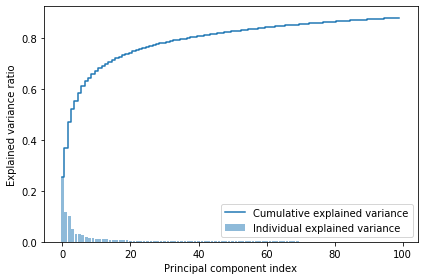

In [ ]:
from sklearn.decomposition import PCA as pca
my_pca = pca(n_components = 100, svd_solver ="full")    #using 100 as a trial value to check the variances for number of components below it
my_pca.fit_transform(ind1)
explained_var_ratio = my_pca.explained_variance_ratio_

cum_explained_var = np.cumsum(explained_var_ratio)
print(cum_explained_var)

#(Reference: https://vitalflux.com/pca-explained-variance-concept-python-example/)
plt.bar(range(0,len(explained_var_ratio)), explained_var_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_explained_var)), cum_explained_var, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
ind1

array([[ 0.36378042,  0.33561074,  0.35516905, ...,  0.09534969,
         0.08285768,  0.0573682 ],
       [-0.24798429, -0.27615396, -0.24090938, ..., -0.23406208,
        -0.1328286 , -0.31125925],
       [-0.28719998, -0.25262455, -0.2134584 , ...,  0.36985949,
         0.31815179,  0.31619173],
       ...,
       [-0.25582743, -0.25262455, -0.24875252, ...,  0.08750655,
         0.16128905,  0.15148585],
       [-0.29112155, -0.26438926, -0.24483095, ..., -0.29680717,
        -0.28969134, -0.2798867 ],
       [-0.35778821, -0.3585069 , -0.35855644, ..., -0.02229737,
        -0.02302468, -0.01322004]])

In [ ]:
from sklearn.decomposition import PCA as pca
#creating a PCA object using 50 components
updated_pca =  pca(n_components = 50, whiten=True, svd_solver ="auto")
pca_independentVar = updated_pca.fit_transform(ind1)
pca_independentVar

array([[ 0.89707361,  0.2754274 ,  0.3401019 , ...,  0.11252215,
         0.62884305,  1.06368481],
       [ 1.20316594, -0.23463016,  0.29676225, ..., -0.1796869 ,
        -0.58982541, -1.25206707],
       [ 0.30272424, -0.52088572, -0.78554115, ...,  0.77850797,
         0.09744545,  0.59493398],
       ...,
       [-0.73180083, -1.78460157, -0.02019592, ...,  1.48312351,
         0.78450124, -1.88631641],
       [-0.28858351,  0.12128076,  0.94784913, ..., -1.54962326,
        -0.06591403,  1.63474298],
       [ 1.2015577 , -0.93303431, -2.93518964, ..., -0.48772208,
         0.15351493, -0.52398417]])

In [ ]:
pickle.dump(updated_pca, open('./model/updated_pca.pickle','wb'))

In [ ]:
np.savez('./model/data_pca_dep_mean.pickle.npz',pca_independentVar,normalized_dep,normalized_ind.mean(axis=0))

In [ ]:
pca_inv = updated_pca.inverse_transform(pca_independentVar)

In [ ]:
#Splitting pattern - 80%(train), 20%(test)
from sklearn.model_selection import train_test_split
pca_independentVar_train, pca_independentVar_test, normalized_dep_train, normalized_dep_test = train_test_split(pca_independentVar, normalized_dep, test_size=0.2, random_state=10)

In [ ]:
from sklearn.svm import SVC
svm =  SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)
svm.fit(pca_independentVar_train, normalized_dep_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#accuracy of the model on train and test set
acc1 = svm.score(pca_independentVar_train, normalized_dep_train)
acc2 = svm.score(pca_independentVar_test, normalized_dep_test)
print(acc1, acc2)

0.8567177843900206 0.8060384263494969


In [ ]:
#saving the trained SVM for applying to other test images
pickle.dump(svm,open('./model/trained_svm.pickle','wb'))